In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [32]:
data_frame = pd.read_csv("data/Salestrain.csv")

data_frame = data_frame["data"].values

data_frame.shape

(96,)

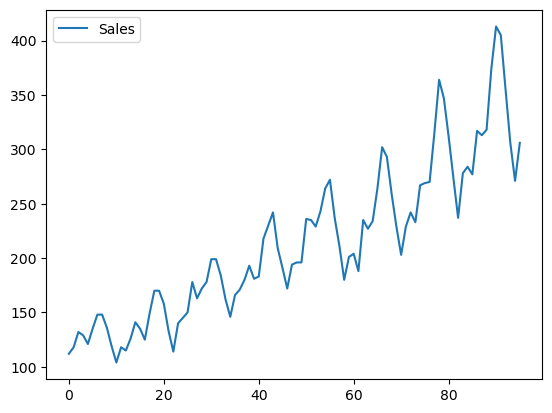

In [33]:
plt.plot(data_frame, label="Sales")
plt.legend()
plt.show()

In [34]:
stl = STL(data_frame, period=12)

res = stl.fit()

In [35]:
res.resid

array([  0.38835752,  -2.50750691,  -0.93625151,   2.14162814,
         1.95456987,   1.21890815,  -0.80002572,   0.80836527,
        -1.89984247,   1.34346989,   1.65187552,  -1.82788746,
        -4.50456314,  -1.06687059,  -3.05765906,  -1.90213468,
        -7.77034967,  -1.31406681,   2.38807894,   0.4812818 ,
         2.38690557,  -2.88002304,  -5.80996708,  -0.20666854,
         2.38439658,   0.81047685,   6.42077269,  -0.98227956,
         9.20876026,  -4.66903365,  -2.50406235,  -5.89644175,
        -0.16347293,  -0.26313277,   3.24944939,   2.09441975,
         3.28026057,   8.71633635,  -5.98884203,  -9.45304011,
        -8.92739973,   5.01082799,  -3.71550738,   2.92040346,
        -4.05009791,   0.06229684,   2.29264496,   1.64605422,
        -1.14771963,   1.01210254,   8.24062672,  14.55119312,
         7.83958054,  -2.78424127,  -6.19235752,   2.11499237,
         1.15053649,   2.76388894,  -0.70161573,  -2.47191521,
        -4.20817055, -13.42517527,  -1.67668854,  -4.62

In [36]:
anomalies = np.where(res.resid > 2 * np.std(res.resid))[0]

anomalies

array([28, 37, 51])

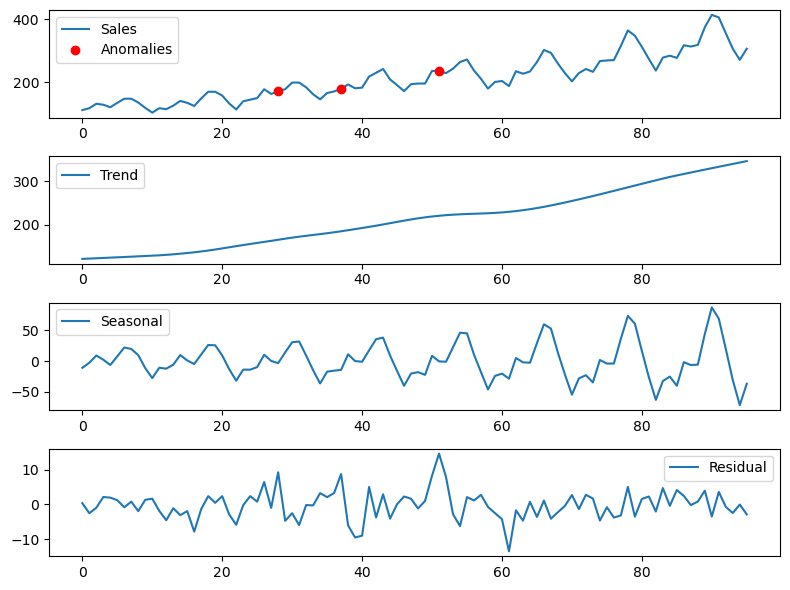

In [37]:
plt.figure(figsize=(8, 6))

plt.subplot(4, 1, 1)
plt.plot(data_frame, label="Sales")
plt.plot(anomalies, data_frame[anomalies], "ro", markersize=6, label="Anomalies")
plt.legend(loc="best")

plt.subplot(4, 1, 2)
plt.plot(res.trend, label="Trend")
plt.legend(loc="best")

plt.subplot(4, 1, 3)
plt.plot(res.seasonal, label="Seasonal")
plt.legend(loc="best")

plt.subplot(4, 1, 4)
plt.plot(res.resid, label="Residual")
plt.legend(loc="best")

plt.tight_layout()
plt.show()